In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## One hot encoding labels

In [ ]:
y_train_cat= tf.keras.utils.to_categorical(y_train)
y_test_cat= tf.keras.utils.to_categorical(y_test)

## Normalization

In [ ]:
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

train_norm = train_norm/255.0
test_norm = test_norm/255.0

In [ ]:
train_norm.shape, test_norm.shape

((60000, 28, 28), (10000, 28, 28))

## Plotting train data

In [ ]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

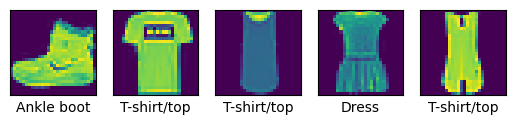

In [ ]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

## Building and training model

In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', name="conv-layer-1"),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name="pooling-layer-1"),

    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', name="conv-layer-2"),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name="pooling-layer-2"),

    tf.keras.layers.GlobalAveragePooling2D(name="pooling-layer-3"),
    tf.keras.layers.Dense(len(class_names), activation='softmax', name="FCL")
])

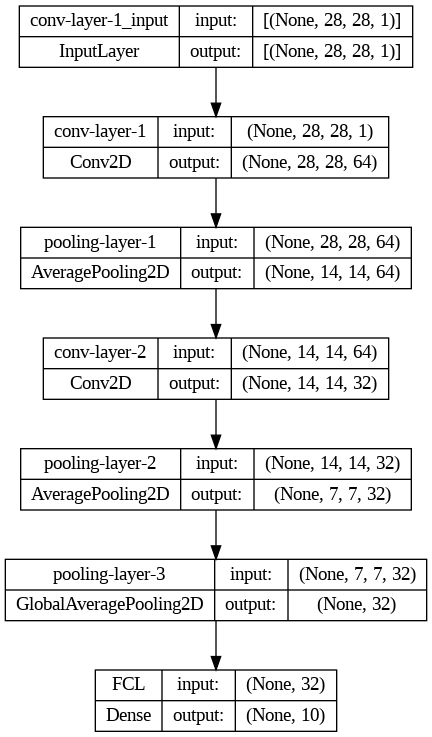

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv-layer-1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 pooling-layer-1 (AveragePo  (None, 14, 14, 64)        0         
 oling2D)                                                        
                                                                 
 conv-layer-2 (Conv2D)       (None, 14, 14, 32)        18464     
                                                                 
 pooling-layer-2 (AveragePo  (None, 7, 7, 32)          0         
 oling2D)                                                        
                                                                 
 pooling-layer-3 (GlobalAve  (None, 32)                0         
 ragePooling2D)                                                  
                                                        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_norm, y_train_cat, epochs= 10, validation_data=(test_norm, y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 106s 55ms/step - loss: 1.2419 - accuracy: 0.5599 - val_loss: 0.9348 - val_accuracy: 0.6793
Epoch 2/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.8245 - accuracy: 0.7150 - val_loss: 0.7606 - val_accuracy: 0.7421
Epoch 3/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.7030 - accuracy: 0.7573 - val_loss: 0.6929 - val_accuracy: 0.7627
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.6424 - accuracy: 0.7765 - val_loss: 0.6381 - val_accuracy: 0.7847
Epoch 5/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.6038 - accuracy: 0.7897 - val_loss: 0.6318 - val_accuracy: 0.7854
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.5794 - accuracy: 0.7990 - val_loss: 0.6020 - val_accuracy: 0.7921
Epoch 7/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.5603 - accuracy: 0.8043 - val_loss: 0.5774 

## Evaluate model

<Axes: >

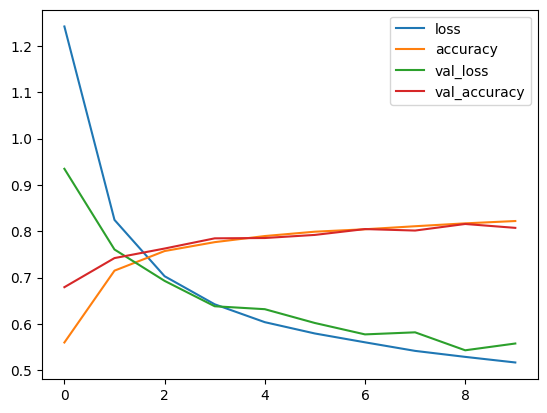

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(test_norm, y_test_cat)

313/313 [==============================] - 4s 14ms/step - loss: 0.5577 - accuracy: 0.8073


[0.5577302575111389, 0.8072999715805054]

In [ ]:
y_pred=model.predict(test_norm)
y_pred=tf.argmax(y_pred, axis=1)

313/313 [==============================] - 4s 13ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.8073

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.73      1000
           1       0.95      0.95      0.95      1000
           2       0.79      0.72      0.75      1000
           3       0.84      0.69      0.76      1000
           4       0.58      0.84      0.69      1000
           5       0.97      0.91      0.94      1000
           6       0.48      0.50      0.49      1000
           7       0.88      0.94      0.91      1000
           8       0.95      0.93      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

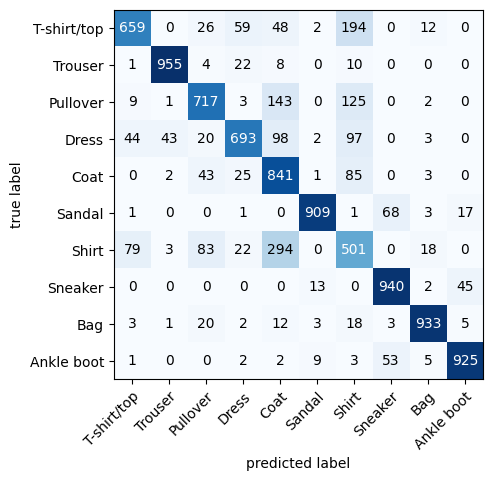

In [ ]:
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=class_names)

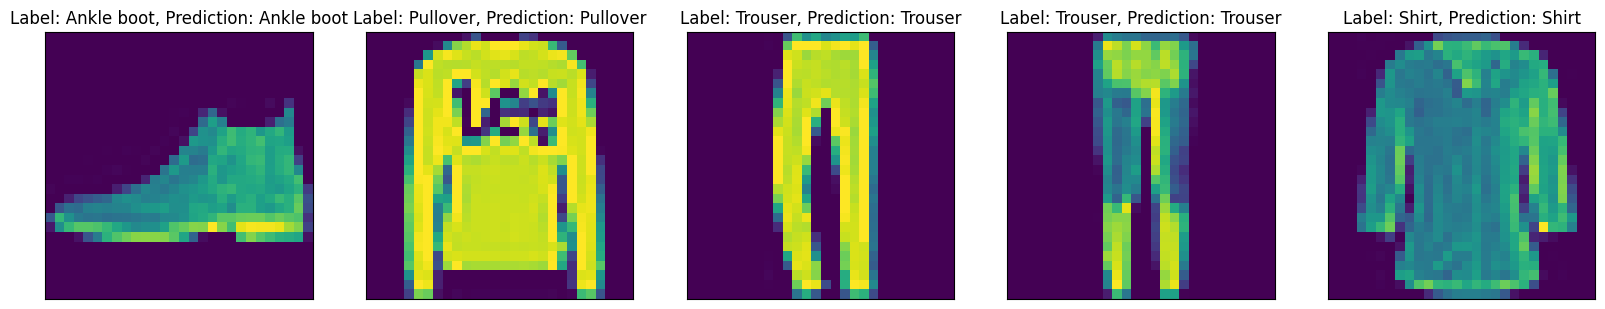

In [ ]:
plt.figure(figsize=(20,10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i])
  prediction= y_pred[i]
  label = class_names[y_test[i]]
  prediction = class_names[prediction]
  plt.title(f"Label: {label}, Prediction: {prediction}")